In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import date
from scipy.stats import mode

df = pd.read_sql('SELECT * FROM superstore', con=engine)
df['order date'] = pd.to_datetime(df['order date'])
df['ship date'] = pd.to_datetime(df['ship date'])

df.columns
df = df.rename(columns={'order date': 'Order Date', 'ship date': 'Ship Date'})
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.00,41.914,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.00,219.582,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.00,6.871,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577,5,0.45,-383.031,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.20,2.516,2015,10


## Random Forest


In [14]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Year                      int32
Month                     int32
dtype: object

##### Preparar los datos

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Variable target Binaria
df['Profitable'] = (df['Profit'] > 0).astype(int)

# Variables predictoras
X = df[['Discount', 'State', 'Category', 'Sub-Category', 'Region', 'Year', 'Month','Quantity']]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Variable objetivo
y = df['Profitable']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Entrenar modelo y hacer predicciones

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9370917841182537
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82       595
           1       0.93      1.00      0.96      2314

    accuracy                           0.94      2909
   macro avg       0.96      0.85      0.89      2909
weighted avg       0.94      0.94      0.93      2909

Confusion Matrix:
 [[ 416  179]
 [   4 2310]]


##### Importancia de Variables


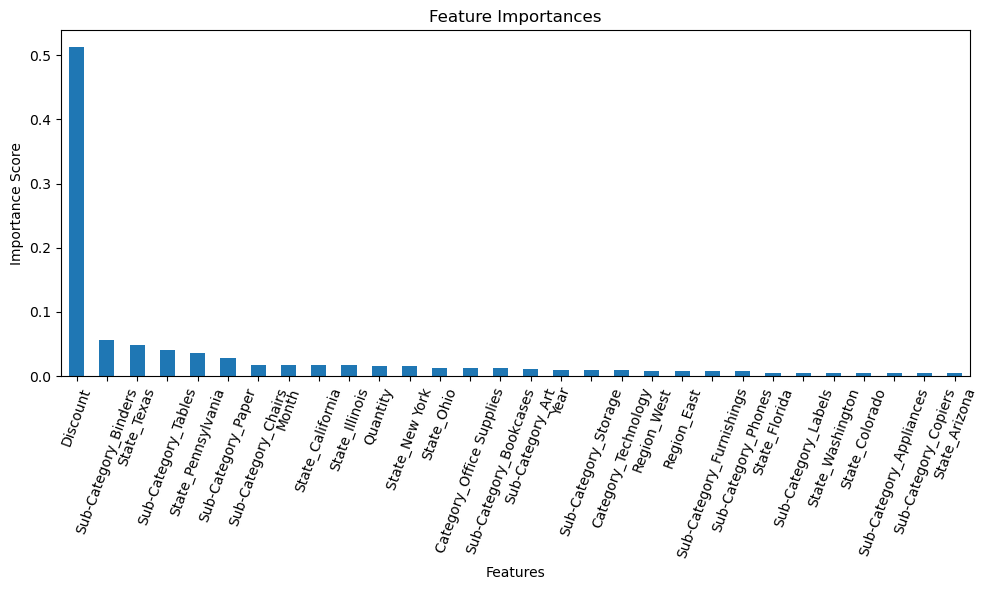

In [20]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False).head(30)
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()
